# EDA

## IMPORTAR PAQUETES

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [13]:
ruta_proyecto = r'C:\Users\iagzg\Desktop\D4FB\D4FB\EstructuraDirectorio\03_MACHINE_LEARNING\06-MACHINE LEARNING PROJECT FRAMEWORK\CASOS\04_BANK\\'

Nombres de los ficheros de datos.

In [14]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [15]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

## EDA CATEGÓRICAS

### Análisis estadístico

In [18]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [19]:
frecuencias_cat(cat)

,Variable,Valor,Frecuencia
34,canal_contacto,telephone,0.381779
33,canal_contacto,cellular,0.618221
45,dia_semana,fri,0.192070
49,dia_semana,wed,0.195727
48,dia_semana,tue,0.197326
47,dia_semana,thu,0.204372
46,dia_semana,mon,0.210504
20,educacion,illiterate,0.000495
23,educacion,unknown,0.041210
17,educacion,basic.6y,0.058272


### Análisis gráfico

In [20]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

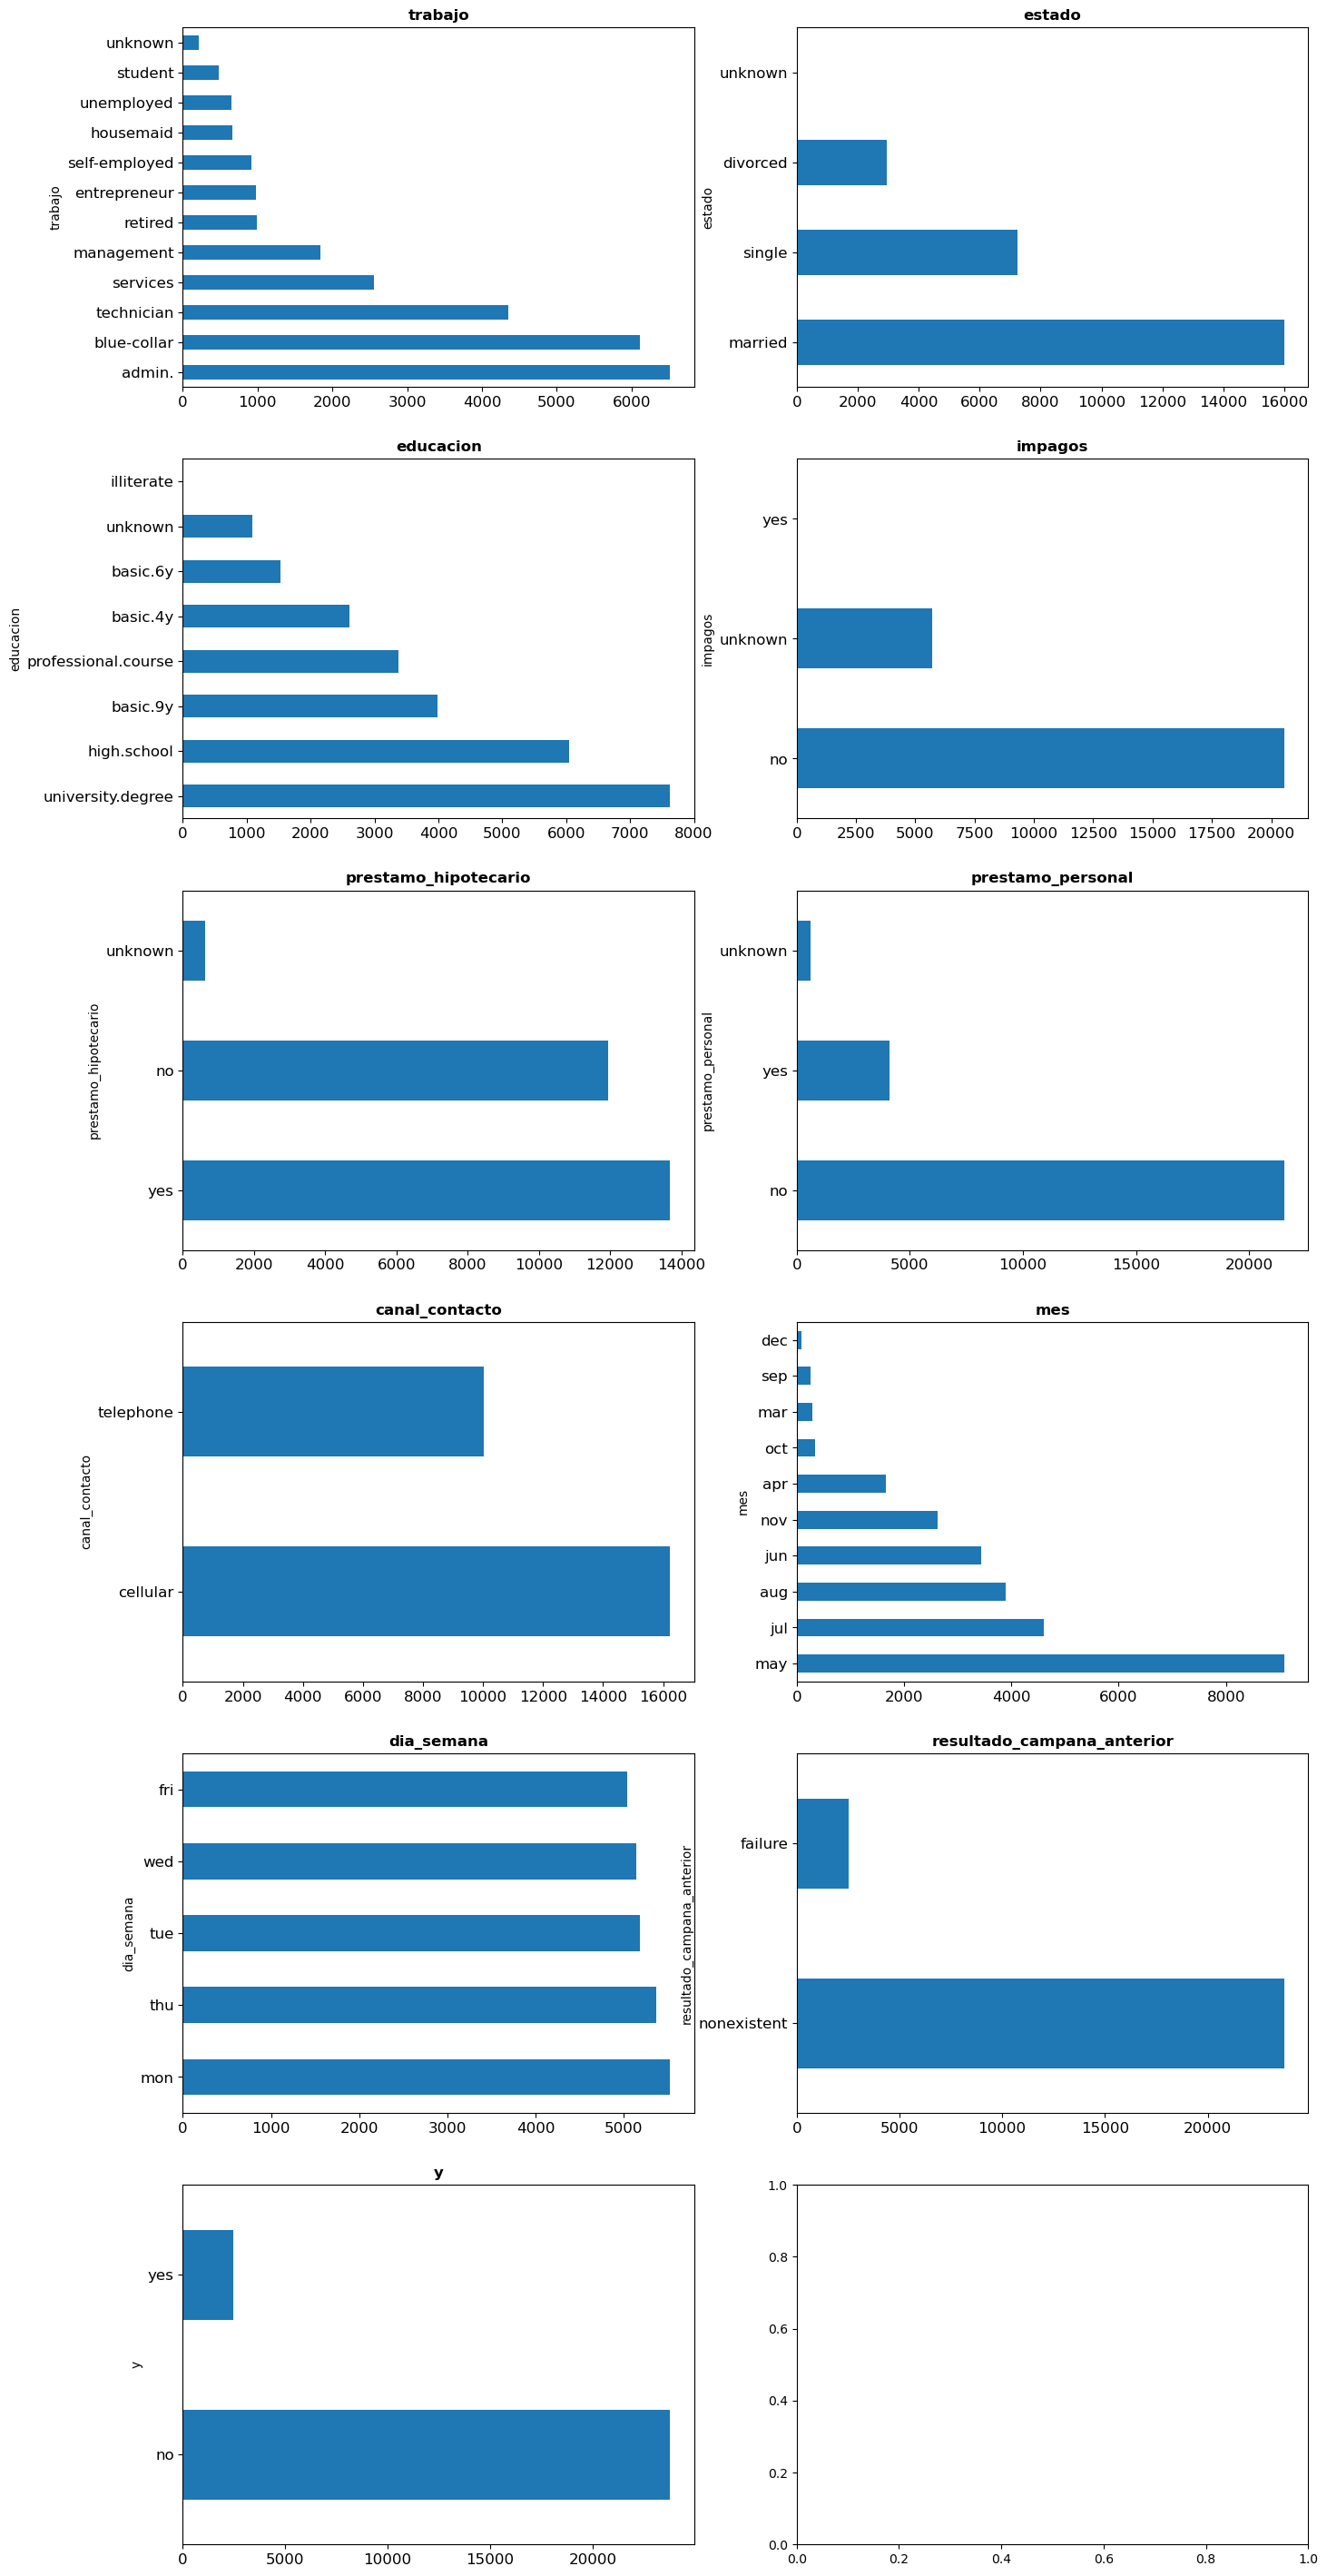

In [21]:
graficos_eda_categoricos(cat)

- En impagos hay pocos valores de "yes" y además unknown no nos proporciona información. Por tanto vamos a eliminar la variable.
- Los registros unknown de prestamo_hipotecario y prestamo_personal los eliminamos. Para ello eliminamos los registros tanto de num como de cat.

In [22]:
cat.drop('impagos', axis = 1, inplace = True)

In [23]:
cat = cat[(cat['prestamo_hipotecario'] != 'unknown') & (cat['prestamo_personal'] != 'unknown')]
num = num.loc[cat[(cat['prestamo_hipotecario'] != 'unknown') & (cat['prestamo_personal'] != 'unknown')].index]

## EDA NUMÉRICAS

In [25]:
num

,edad,num_contactos_esta_semana,num_dias_ultimo_contacto,num_contactos_otras_campañas,variacion_tasa_empleo,euribor3m
0,57,1,999,0,1.1,4.857
1,40,1,999,0,1.1,4.857
2,59,1,999,0,1.1,4.857
3,25,1,999,0,1.1,4.857
4,41,1,999,0,1.1,4.857
...,...,...,...,...,...,...
28826,36,2,999,0,-1.1,1.028
28827,37,1,999,0,-1.1,1.028
28829,46,1,999,0,-1.1,1.028
28830,44,1,999,0,-1.1,1.028


### Análisis estadístico

In [11]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [12]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
edad,25626.0,39.947631,38.0,9.977985,18.0,32.0,38.0,47.0,81.0
num_contactos_esta_semana,25626.0,2.428003,2.0,1.987646,1.0,1.0,2.0,3.0,13.0
num_dias_ultimo_contacto,25626.0,999.0,999.0,0.0,999.0,999.0,999.0,999.0,999.0
num_contactos_otras_campañas,25626.0,0.096738,0.0,0.295606,0.0,0.0,0.0,0.0,1.0
variacion_tasa_empleo,25626.0,0.17012,1.1,1.52689,-3.4,-1.8,1.1,1.4,1.4
euribor3m,25626.0,3.732683,4.857,1.67552,0.634,1.405,4.857,4.961,5.045


La variable num_dias_ultimo_contacto parece tener 999 como único valor. Comprobamos:

In [13]:
num.num_dias_ultimo_contacto.value_counts()

num_dias_ultimo_contacto
999    25626
Name: count, dtype: int64

Al tener solo un valor esta variable no nos aporta información, la eliminamos:

In [14]:
num.drop('num_dias_ultimo_contacto', axis = 1, inplace = True)

### Análisis gráfico

In [15]:
def graficos_eda_continuas(num):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

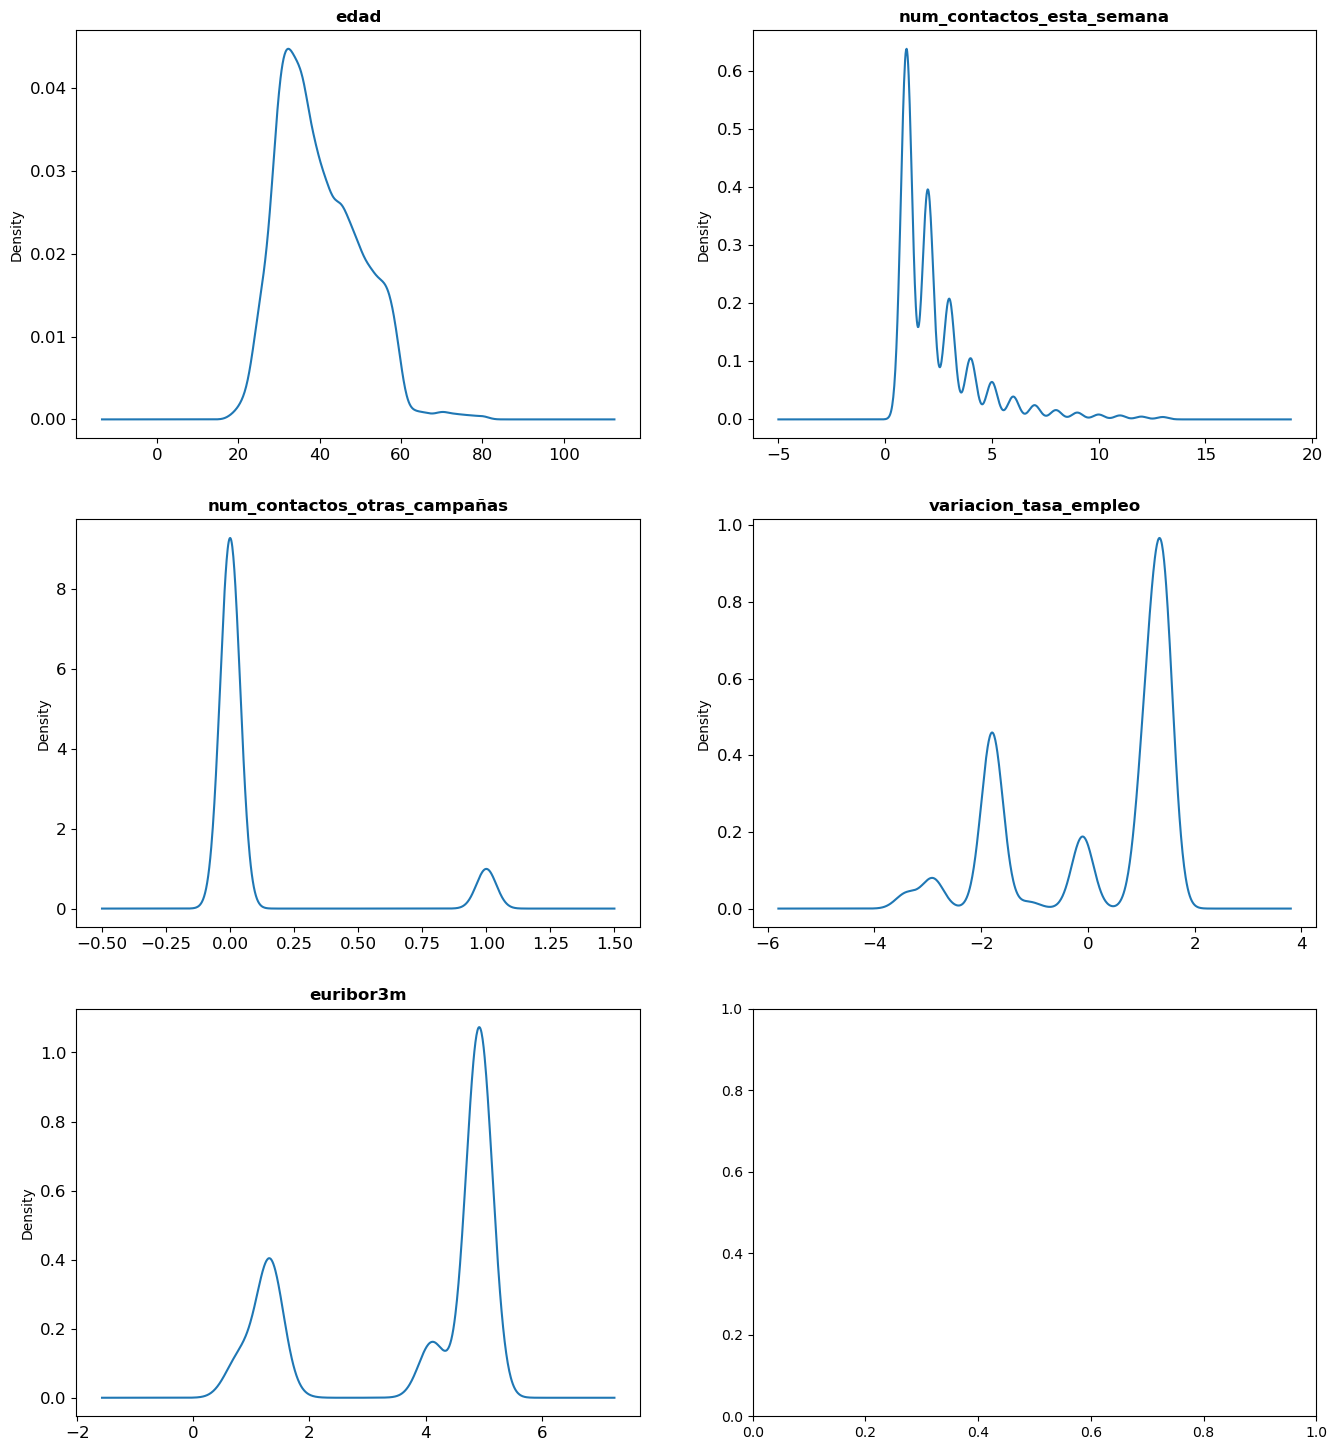

In [16]:
graficos_eda_continuas(num)

En base a estos análisis realizaremos unas transformaciones que nos permitan diferenciar más los tipos de clientes que tenemos:
- La tasa de desempleo la binarizaremos en el notebook de transformación de variables. De manera que tome el valor 0 cuando sea negativa y el valor 1 cuando sea positiva.
- La edad la discretizaremos para que tenga 5 o 6 valores.

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guardar los avances en cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.


In [17]:
#Definir los nombres de los archivos
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [18]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)